In [7]:
from skimage import data, color, io
import skimage.util as util
from scipy.ndimage import convolve
import matplotlib.pyplot as plt
import numpy as np

### Imagen e Histograma

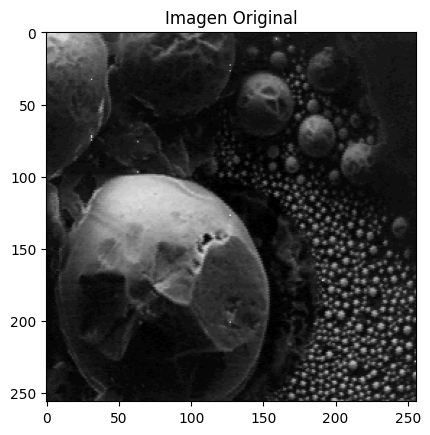

In [8]:
image = "Imagenes/MEB.png"
plt.title("Imagen Original")
plt.imshow(plt.imread(image)) # Cuando la imagen es importada se debe leer con plt.imread

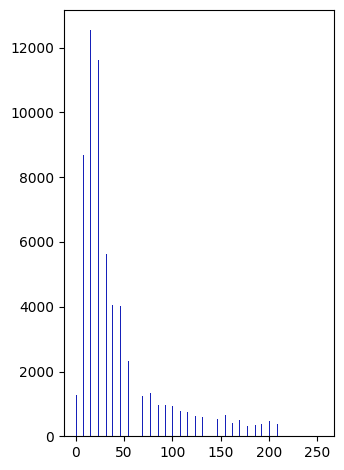

In [9]:
img = io.imread(image)

plt.subplot(1, 2, 2)
if img.ndim == 2:  # ndim = 2 significa que la imagen es en escala de grises
    plt.hist(img.ravel(), bins=256, color='gray', alpha=0.7)
else:  # ndim = 3 significa que es a color
    c = ('r', 'g', 'b')
    for i, h in enumerate(c):
        plt.hist(img[:, :, i].ravel(), bins=256, color=h, alpha=0.7)

plt.tight_layout()
plt.show()

### Describa su forma (Continuo? Discontinuo? Niveles de gris?)

- La imagen es discontinua porque se observan picos bien definidos en ciertos valores de intensidad
- La mayor parte de los pixeles están concentrados en valores bajos de intensidad, cercanos a 0, lo que indica que a imagen tiene una mayor cantidad de tonos oscuros
- El histograma indica que la imagen es asimétrica y sesgada hacia la izquierda, con un pico alto en valores cercanos a 0 y una caída progresiva hacia los valores más altos

### Aplicar filtro utilizando una máscara de tamaño 3x3

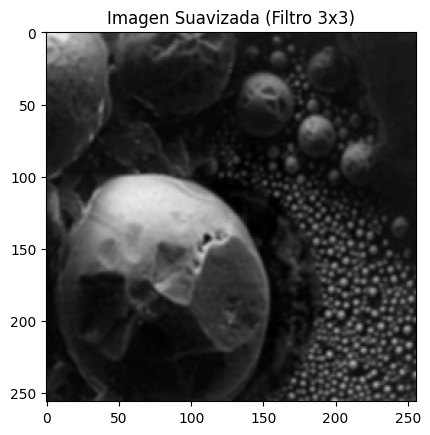

In [10]:
img_gray = color.rgb2gray(img)
kernel_3x3 = np.ones((3, 3)) / 9
imagen_suavizada = convolve(img_gray, kernel_3x3)

plt.imshow(imagen_suavizada, cmap='gray')
plt.title('Imagen Suavizada (Filtro 3x3)')
plt.show()

- Se eliminó el ruido y los bordes muy marcados
- La imagen tiene menos detalles finos, lo que demuestra el efecto suavizado

### Histograma de la nueva imagen

Text(0.5, 1.0, 'Histograma después del filtro 3x3')

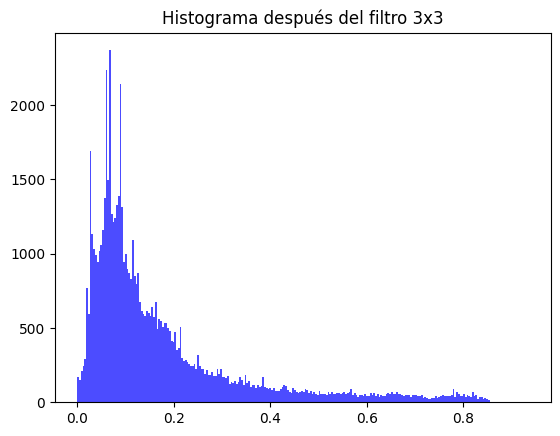

In [6]:
plt.hist(imagen_suavizada.ravel(), bins=256, color='blue', alpha=0.7)
plt.title('Histograma después del filtro 3x3')

- Se mantiene la mayoría de pixeles entre los valores bajos, pero la transición de valores es más suave
- Se redujo la altura de los picos máximos, es decir, hay una disminución en la variabilidad de intensidades

### Diferencia de la imagen suavizada con la original

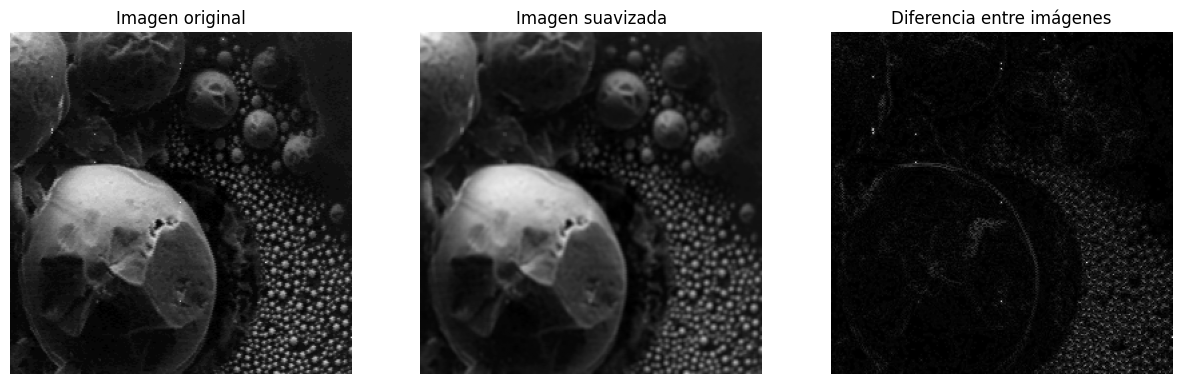

In [ ]:
imagen_diferencia = np.abs(img_gray - imagen_suavizada)

# Mostrar las imágenes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(img, cmap='gray')
axs[0].set_title('Imagen original')
axs[0].axis('off')

axs[1].imshow(imagen_suavizada, cmap='gray')
axs[1].set_title('Imagen suavizada')
axs[1].axis('off')

axs[2].imshow(imagen_diferencia, cmap='gray')
axs[2].set_title('Diferencia entre imágenes')
axs[2].axis('off')

plt.show()

- Se observan líneas pequeñas alrededor de ciertas formas de la imagen original
- En la parte inferior derecha se puede observar variaciones debido a que es una zona con mucho detalle y el filtro las suaviza

### Aplicar filtro utilizando una máscara de tamaño 5x5 y doble filtro utilizando máscaras de 3x3

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

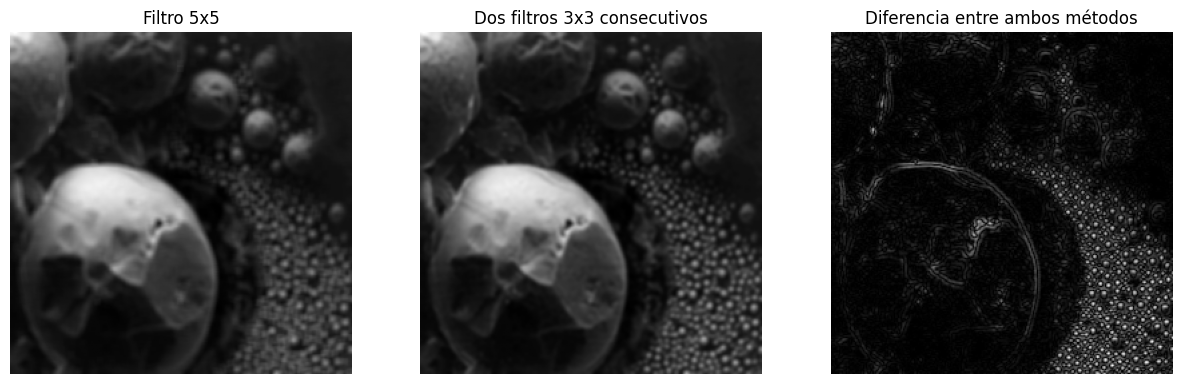

In [41]:
kernel_5x5 = np.ones((5, 5)) / 25
imagen_suavizada_5x5 = convolve(img_gray, kernel_5x5)
imagen_suavizada_doble_3x3 = convolve(imagen_suavizada, kernel_3x3)
imagen_diferencia_final = np.abs(imagen_suavizada_5x5 - imagen_suavizada_doble_3x3)

# Mostrar las imágenes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(imagen_suavizada_5x5, cmap='gray')
axes[0].set_title('Filtro 5x5')
axes[0].axis('off')

axes[1].imshow(imagen_suavizada_doble_3x3, cmap='gray')
axes[1].set_title('Dos filtros 3x3 consecutivos')
axes[1].axis('off')

axes[2].imshow(imagen_diferencia_final, cmap='gray')
axes[2].set_title('Diferencia entre ambos métodos')
axes[2].axis('off')

**¿Las dos imagenes obtenidas son identicas?**
- No, no son identicas a pesar de presentar un efecto suavizado. Se puede observar una diferencia en la intensidad y los detalles en algunas zonas 

**¿Por qué?** 
- Presentan un filtro distinto, donde el de 5x5 es de mayor tamaño, además de que en el segundo se implementó un filtro doble de 3x3
- En el filtro 5x5 se suaviza más la imagen y como se puede observar en la imagen es un efecto más dilatado. En el filtro 3x3 se suaviza la imagen progresivamente y no se eliminan tantos detalles, lo que permite que se conserven mejor los bordes y las texturas.

**¿Cuál de los dos tratamientos suprime mejor los cambios de nivel de gris?**
- Si se quiere crear una suavización fuerte y reducción de ruido, el filtro 5x5 es mejor
- Si se quiere suavizar sin perder mucho detalle, el doble filtro 3x3 es mejor